<a href="https://colab.research.google.com/github/monanana2025/Weather-Wise-Mengchu-Yu/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [156]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install pyinputplus

!pip install ipywidgets
!pip install upgrade openai

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [157]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: 


## 📦 Setup and Configuration
Import required packages and setup environment.

In [158]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# Add any other setup code here
import ipywidgets as widgets
from IPython.display import display

## 🌤️ Weather Data Functions

In [159]:
# Define get_weather_data() function here

#====================================================================
# NOTE: ALL widgets were move to the 🧭 User Interface section
#====================================================================

def get_weather_data(location: str, forecast_days: int=3) -> dict:
  days = max(1, min(int(forecast_days), 5))


#Note:(Testing note) When testing, the API data could not be read correctly.To make it work better, I used the 'raw_json' format for getting data.

  raw = get_weather(location=location, format="raw_json", use_mock=False)

  if isinstance(raw, str) and raw. startswith("Error"):
      raise RuntimeError(raw)
  if not isinstance(raw, dict):
      raise RuntimeError("Unexpected API response (not JSON dict).")

  if"weather" in raw:
      raw["weather"] = (raw.get("weather") or [])[:days]

  if "forecast" in raw:
      raw["forecast"] = (raw.get("forecast") or [])[:days]

  return raw

#====================================================================
# BELOW: Original code kept for traceability, NOT executed
#====================================================================
# try:
#    return get_weather(location.strip(), int(forecast_days))

#  except Exception as e:
#    print(f"Error fetching weather data: {e}")
#    return None

## Pick start date
#date_picker = widgets.DatePicker(
#    description='Start Date',
#    disabled=False,
#    layout=widgets.Layout(width="350px")
#)

## forecast
#forecast_days = widgets.Dropdown(
#    options=[1, 2, 3, 4, 5],
#    value=1,
#    description='forecast (days):',
#    disabled=False,
#    layout=widgets.Layout(width="350px")
#)

  #===========================================================
  #update by city selction
  #===========================================================

  ##input city

#while True:
#  location = input("please enter a city").strip()
#  if isinstance(location,str) and len(location) > 0 and not city.isdigit():
#    print(f"You entered: {location}")
#    break
#  else:
#    print("Invalid input. Please enter a non-empty string.")
##===========================================================

## Predifined major cities
#location_options = [
#    "Perth, WA", "Melbourne, VIC", "Sydney, NSW", "Brisbane, QLD", "Adelaide, SA",
#    "Darwin, NT", "Hobart, TAS", "Canberra, ACT", "Custom City"
#]

## city selection
#location_dropdown = widgets.Dropdown(
#    options=location_options,
#    value="Perth, WA",
#    description='Select City:',
#    disabled=False,
#    layout=widgets.Layout(width="350px")
#)

##custom selection
#custom_location = widgets.Text(
#    value="",
#    placeholder="Enter custom city",
#    description="Custom City:",
#    disabled=True,
#    layout=widgets.Layout(width="350px")
#)

#def on_location_change(change):
#    custom_location.disabled = change['new'] != "Custom City"
#    if change['new'] != "Custom City":
#        custom_city.value =""

#location_dropdown.observe(on_location_change, names='value')


## Action button
#run_button = widgets.Button(
#    description="Run")
#output = widgets.Output()
##display
#display(date_picker, duration_days, city_dropdown, custom_city, run_button, output)


## 📊 Visualisation Functions

In [160]:
# Define create_temperature_visualisation() and create_precipitation_visualisation() here
import json, re

def create_temperature_visualisation(weather_data, output_type='display'):
##=========================
  ## adjust with raw_json
  if not isinstance(weather_data,dict):
    print("No weather data available for visualisation.")
    return

  dates, temps = [], []

  if "weather" in weather_data:
    days = weather_data["weather"] or []
    dates = [day["date"] for day in days]
    temps = [
        float(day["avgtempC"]) if day["avgtempC"] is not None else None
        for day in days
    ]

  elif "forecast" in weather_data:
    days = weather_data["forecast"] or []
    dates = [day["date"] for day in days]
    temps = [day["temperature"] for day in days]

  else:
    print("No weather data available for visualisation.")
    return
##=========================

  if not dates or not any(t is not None for t in temps):
      print("No temperature data available for visualisation.")
      return
  temps = [0.0 if t is None else float(t) for t in temps]

  plt.figure(figsize=(10, 6))
  plt.plot(dates, temps, marker='o', linestyle='-', color='orange')
  plt.title('Temperature Forecast')
  plt.xlabel('Date')
  plt.ylabel('Temperature (°C)')
  plt.grid(True)
  plt.tight_layout()

  if output_type == 'display':
        plt.show()
  else:
      return plt.gcf()

In [161]:
def create_precipitation_visualisation(weather_data: dict, output_type='display'):

    from collections import Counter

    if not isinstance(weather_data, dict):
        print("No weather data available for visualisation.")
        return

    if "weather" in weather_data:
        days = weather_data.get("weather") or []
        if not days:
            print("No weather data available for visualisation.")
            return

        dates = [day["date"] for day in days]
        # Calculate total daily precipitation by summing hourly precipMM
        precs = []
        for day in days:
            total_precip_today = 0.0
            for hour in day.get("hourly", []):
                try:
                    precip = float(hour.get("precipMM", 0.0))
                    total_precip_today += precip
                except (ValueError, TypeError):
                    # Handle cases where precipMM is not a valid number
                    pass
            precs.append(total_precip_today)


        plt.figure(figsize=(10, 6))
        plt.bar(dates, precs, color='skyblue')
        plt.title('Total Daily Precipitation (mm)')
        plt.xlabel('Date')
        plt.ylabel('Precipitation (mm)')
        plt.xticks(rotation=45)
        plt.tight_layout()

    elif "forecast" in weather_data:
        days = weather_data["forecast"] or []
        if not days:
            print("No weather data available for visualisation.")
            return

        conditions = [day.get("conditions", "Unknow") for day in days]
        condition_counts = Counter(conditions)

        plt.figure(figsize=(10, 6))
        plt.bar(list(condition_counts.keys()), list(condition_counts.values()), color='skyblue')
        plt.title('Precipitation')
        plt.xlabel('Conditions')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.tight_layout()

    else:
        print("No weather data available for visualisation.")
        return

    if output_type == 'display':
        plt.show()
    else:
        return plt.gcf()

## 🤖 Natural Language Processing

In [162]:
# Define parse_weather_question() and generate_weather_response() here
import json
import requests
import os
import openai
##========================================
## Note(Testing note) ： The original API "hands_on_ai.chat.get_response()" always returned HTTP 405 (Method Not Allowed).
# Then local Ollama test gave "ConnectionRefusedError" (service not running).
# The online Ollama Cloud "https://api.ollama.ai" returned DNS error ("Name or service not known").
# Because all three failed, I replaced the API with ChatGPT (OpenAI API).
# This version also includes a simple offline mock return for testing in environments without network.
##========================================
from openai import OpenAI

os.environ["OPENAI_API_KEY"] = "sk-……"
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
MODEL_NAME = "gpt-3.5-turbo"

def _ask_chatgpt(prompt: str) -> str:
    try:
        response = client.chat.completions.create(
            model=MODEL_NAME,
            messages=[{"role": "user", "content": prompt}],
            temperature=0.2,
        )
        return (response.choices[0].message.content or "").strip()
    except Exception as e:
        print(f"Error sending prompt to ChatGPT: {e}")
        print("Using mock JSON reply for offline testing.")
        return'{"city": "Perth, WA", "forecast_days": 3, "weather_type": "rain"}'

def parse_weather_question(question: str) -> dict | None:
    if not question or not isinstance(question, str):
        print("No question provided")
        return None

    prompt = f"""
Return ONLY valid JSON. NO extra words.
If you are not sure, use: {{"city":"Perth, WA","forecast_days":3,"weather_type":"general"}}.
Fields:
- "city": string
- "forecast_days": integer 1-5
- "weather_type": one of ["rain","sun","wind","cloud","general"]
Question: {question}
"""


    reply = _ask_chatgpt(prompt)

    if not reply:
      print("No response from ChatGPT (maybe no network).")
      return {"city":"Perth, WA","forecast_days":3,"weather_type":"general"}

##=======The following content has not been modified============
    try:
      start, end = reply.find("{"), reply.rfind("}")
      if start != -1 and end != -1:
        reply = reply[start:end+1]
      data = json.loads(reply)
    except Exception as e:
      print(f"Error parsing question: {e}")
      return {"city":"Perth, WA", "forecast_days":3, "weather_type": "rain"}

    return{
        "city": (data.get("city", "Perth, WA")).strip(),
        "forecast_days": max(1, min(int(data.get("forecast_days", 3)), 5)),
        "weather_type": (data.get("weather_type", "general")).lower(),
    }
def generate_weather_response(parsed_question: dict, weather_data: dict) -> str:
    if not parsed_question or not weather_data:
        return"No data to generate response"

    city = parsed_question.get("city","Perth, WA")
    forecast_days = int(parsed_question.get("forecast_days",3))
    weather_type = parsed_question.get("weather_type", "general")

    info = weather_data.get("weather") or weather_data.get("forecast") or []
    if not info:
        return f"No weather data available for {city}"

    if weather_type =="rain":
      rainy = [day["date"] for day in info if "rain" in str(day).lower()]
      return (f"It will rain in {city} on {', '.join(rainy)}"
              if rainy else f"It will not rain in {city}")

    temps = [str(day.get('temperature') or day.get("avgtempC")) for day in info[:forecast_days]]

    return f"Average temperature forecast for {city} for the next {forecast_days} days: {', '.join(temps)}°C"


#====================================================================
# BELOW: Original code kept for traceability, NOT executed
#====================================================================

#      ai_reply = get_response(prompt)
#      # Note: During testing, the AI sometimes returned extra characters or text outside braces,so regex is used to isolate the JSON part only.
#      m = re.search(r'(\{.*\})', ai_reply, re.S)
#      data = json.loads(m.group(1) if m else ai_reply)
#      data["forecast_days"] = max(1,min(int(data.get("forecast_days",3)),5))
#      data["city"] = data.get("city") or "Perth, WA"
#      data["weather_type"] = data.get("weather_type") or "general"
#      return data
#    except Exception as e:
#      print(f"Error parsing question: {e}")
#      return _local_parse(question)

## Note: During testing, the API could not be reached or returned invalid data,so local data and regex parsing are used instead to ensure the notebook runs successfully.
#def _local_parse(question: str) -> dict:
#    days = 3
#    m = re.search(r'(\d+)\s*day', question, re.I)
#    if m: days = int(m.group(1))
#    m_city = re.search(r'\b(?:in|at|for|to)\s+([A-Za-z\s]+(?:,\s*[A-Z]{2,3})?)', question, re.I)
#    city = (m_city.group(1).strip() if m_city else "Perth, WA")
#    weather_kw = "general"
#    for kw in ["rain","snow","wind","sun","cloud","fog","storm"]:
#        if re.search(kw, question, re.I):
#            weather_kw = kw; break
#    return {"city": city, "forecast_days": max(1, min(days, 5)), "weather_type": weather_kw}


## 🧩 Main Application Logic

In [163]:
# Tie everything together here
def generate_weather_response(parsed_question: dict, weather_data: dict) -> str | None:
    if not isinstance(parsed_question, dict) or not isinstance(weather_data, dict):
        return "No data to generate response"

    city = (parsed_question.get("city")or "Perth, WA").strip()
    forecast_days = max(1, min(int(parsed_question.get("forecast_days", 3)),5))
    weather_type = (parsed_question.get("weather_type") or "general").lower()

    series = weather_data.get("forecast") or weather_data.get("weather") or []
    days = (series or [])[:forecast_days]
    if not days:
        return f"No forecast data available for {city}"

    temps = []
    cond_texts = []
    for d in days:
        t_val = d.get("temperature", d.get("avgtempC"))
        try:
            temps.append(float(t_val)) if t_val is not None else None
        except (ValueError, TypeError):
            pass

        desc = d.get("conditions", d.get("description", ""))
        cond_texts.append(str(desc))

    valid_temps = [t for t in temps if isinstance(t, (int, float))]
    if not valid_temps:
        return f"Weather forecast for {city} for the next {forecast_days} days: no temperature data available."

    avg_temp = sum(valid_temps) / len(valid_temps)
    max_temp = max(valid_temps)
    min_temp = min(valid_temps)

    if weather_type == "rain":
        rainy_dates = []
        for i, d in enumerate(days):
            text = (cond_texts[i] or "").lower()
            if "rain" in text:
                rainy_dates.append(d.get("date", f"Day {i+1}"))

        if rainy_dates:
          return f"It will likely rain in {city} on {', '.join(rainy_dates)}."
        else:
          return f"It is not expected to rain in {city} over the next {forecast_days} days."

    per_day_str = []
    for i, d in enumerate(days):
        date = d.get("date", f"Day {i+1}")
        t = d.get("temperature", d.get("avgtempC"))
        try:
            t_disp = f"{float(t):.0f}°C"
        except (ValueError, TypeError):
            t_disp = "–"
        desc = d.get("conditions", d.get("description", ""))
        per_day_str.append(f"{date}: {t_disp}{' | '+desc if desc else ''}")


    summary = (
        f"Weather forecast for {city} for the next {forecast_days} days:\n"
        f"- Average temperature: {avg_temp:.1f}°C\n"
        f"- Max temperature: {max_temp:.1f}°C\n"
        f"- Min temperature: {min_temp:.1f}°C\n"
        f"- Details:\n  " + "\n  ".join(per_day_str)
    )

    return summary



## 🧭 User Interface

In [ ]:
from pdb import run
# Define menu functions using pyinputplus or ipywidgets here
## Pick start date
date_picker = widgets.DatePicker(
    description='Start Date',
    disabled=False,
    layout=widgets.Layout(width="350px")
)

# Duration
duration_days = widgets.Dropdown(
    options=[1, 2, 3, 4, 5],
    value=3,
    description='Duration (days):',
    disabled=False,
    layout=widgets.Layout(width="350px")
)

#===========================================================
#update by city selction
#===========================================================

##input city

#while True:
#  city = input("please enter a city").strip()
#  if isinstance(city,str) and len(city) > 0 and not city.isdigit():
#    print(f"You entered: {city}")
#    break
#  else:
#    print("Invalid input. Please enter a non-empty string.")
#===========================================================

# Predifined major cities
city_options = [
    "Perth, WA", "Melbourne, VIC", "Sydney, NSW", "Brisbane, QLD", "Adelaide, SA",
    "Darwin, NT", "Hobart, TAS", "Canberra, ACT", "Custom City"
]

# city selection
city_dropdown = widgets.Dropdown(
    options=city_options,
    value="Perth, WA",
    description='Select City:',
    disabled=False,
    layout=widgets.Layout(width="350px")
)

#custom selection
custom_city = widgets.Text(
    value="",
    placeholder="Enter custom city",
    description="Custom City:",
    disabled=True,
    layout=widgets.Layout(width="350px")
)

def on_city_change(change):
    custom_city.disabled = change['new'] != "Custom City"
    if change['new'] != "Custom City":
        custom_city.value =""

city_dropdown.observe(on_city_change, names='value')

# Action button
run_button = widgets.Button(description="Check")
output = widgets.Output()

# link UI & logic
def _resolved_city()->str:
    if city_dropdown.value == "Custom City":
        return (custom_city.value or "").strip()
    return (city_dropdown.value or "").strip()


def on_run_clicked(btn):
    with output:
        output.clear_output()

        city = _resolved_city()
        if city_dropdown.value == "Custom City" and not city:
            print("Please enter a custom city name.")
            return
        days = int(duration_days.value)
        days = max(1, min(days, 5))

        start_date = date_picker.value
        print(f"Start date: {start_date}  |  City: {city}  |  Days: {days}")

        try:
            data = get_weather_data(city, days)
        except Exception as e:
            print("Failed to retrieve weather data:", e)
            data = {}

        parsed = {"city": city, "forecast_days": days, "weather_type": "general"}


        try:
            resp = generate_weather_response(parsed, data)
            if resp:
                print("\n— Result —")
                print(resp)
        except Exception as e:
            print("Failed to generate weather response:：", e)
run_button.on_click(on_run_clicked)


ai_title = widgets.HTML("<b>Ask the AI about the weather</b>")
ai_question = widgets.Textarea(
    value="Will it rain in Sydney for the next 3 days?",
    placeholder="Type your weather question here...",
    layout=widgets.Layout(width="720px", height="80px")
)
ai_show_charts = widgets.Checkbox(
    value=True,
    description="Show charts for the AI result",
)
ask_button = widgets.Button(description="Ask AI")
ai_output = widgets.Output()

def on_ask_clicked(btn):
    with ai_output:
        ai_output.clear_output()

        q = (ai_question.value or "").strip()
        if not q:
            print("Please enter a question.")
            return


        try:
            parsed = parse_weather_question(q)
        except Exception as e:
            print("Failed to parse question:", e)
            parsed = None

        if not parsed:
            print("No prased result from AI")
            return

        city = parsed.get("city") or "Perth, WA"
        days = int(parsed.get("forecast_days", 3))
        days = max(1, min(days, 5))
        try:
            data = get_weather_data(city, days)
        except Exception as e:
            print("Failed to retrieve weather data:", e)
            data = {}


        try:
            resp = generate_weather_response(parsed, data)
            if resp:
                print("— AI Result —")
                print(resp)
        except Exception as e:
            print("Failed to generate weather response:：", e)


ask_button.on_click(on_ask_clicked)

left_col = widgets.VBox([
    widgets.HTML("<b>User Interface</b>"),
    date_picker, duration_days, city_dropdown, custom_city,
    run_button
])

right_col = widgets.VBox([
    widgets.HTML("<b>Output</b>"),
    output
])

ai_col = widgets.VBox([
    ai_title, ai_question, ai_show_charts, ask_button, ai_output
])

ui = widgets.VBox([widgets.HBox([left_col, right_col]), widgets.HTML("<hr>"), ai_col])
display(ui)


#display
display(date_picker, duration_days, city_dropdown, custom_city, run_button, output)

## 🧪 Testing and Examples

=== 🌤️ Weather Data Functions quick check ===
keys: ['current_condition', 'nearest_area', 'request', 'weather']
First day sample: {'astronomy': [{'moon_illumination': '6', 'moon_phase': 'Waning Crescent', 'moonrise': '04:13 AM', 'moonset': '04:35 PM', 'sunrise': '05:33 AM', 'sunset': '06:31 PM'}], 'avgtempC': '15', 'avgtempF': '60', 'date': '2025-10-19', 'hourly': [{'DewPointC': '8', 'DewPointF': '47', 'FeelsLikeC': '16', 'FeelsLikeF': '60', 'HeatIndexC': '16', 'HeatIndexF': '60', 'WindChillC': '16', 'WindChillF': '60', 'WindGustKmph': '17', 'WindGustMiles': '10', 'chanceoffog': '0', 'chanceoffrost': '0', 'chanceofhightemp': '0', 'chanceofovercast': '90', 'chanceofrain': '71', 'chanceofremdry': '0', 'chanceofsnow': '0', 'chanceofsunshine': '0', 'chanceofthunder': '0', 'chanceofwindy': '0', 'cloudcover': '82', 'diffRad': '0.0', 'humidity': '61', 'precipInches': '0.0', 'precipMM': '0.0', 'pressure': '1011', 'pressureInches': '30', 'shortRad': '0.0', 'tempC': '16', 'tempF': '60', 'time': 

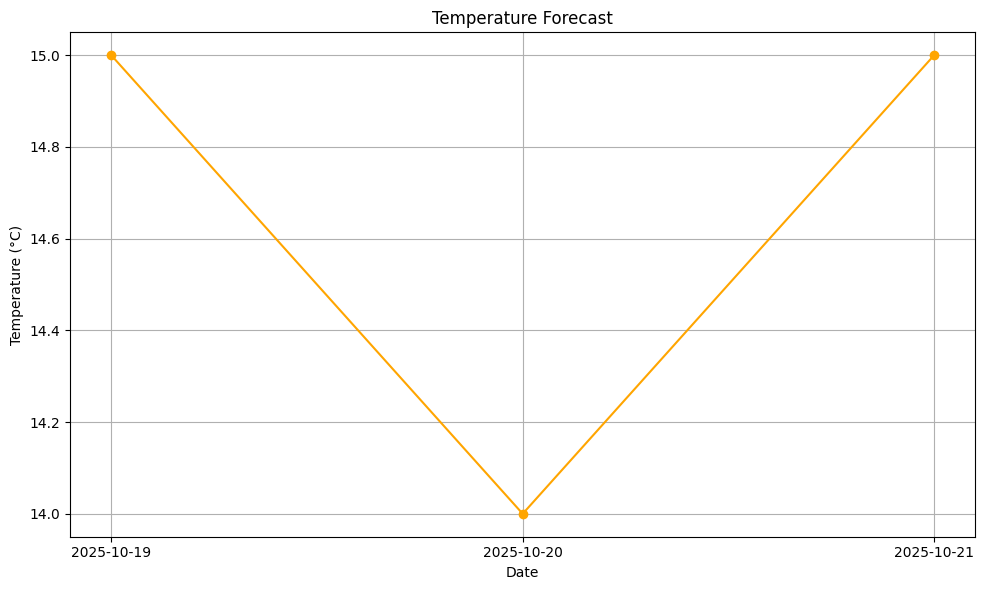

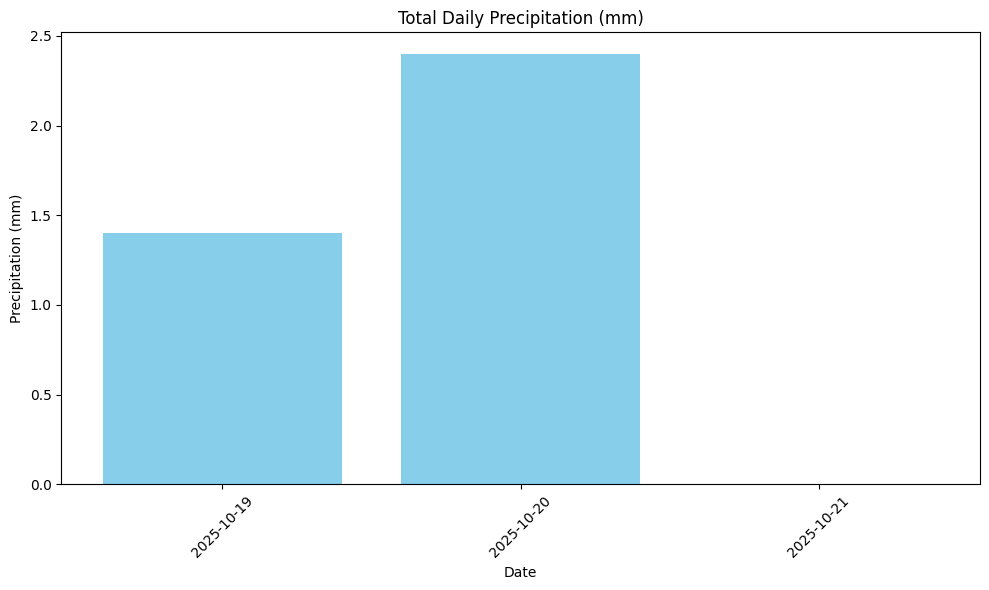

Done.
=== 🤖 Natural Language Processing quick check ===

 Question: What's the temperature in Melbourne for the next 5 days?
Parsed: {'city': 'Melbourne, VIC', 'forecast_days': 5, 'weather_type': 'general'}

 Question: Will it be sunny in Perth tomorrow?
Parsed: {'city': 'Perth, WA', 'forecast_days': 1, 'weather_type': 'sun'}

 Question: How cold will it get in Brisbane this weekend?
Parsed: {'city': 'Perth, WA', 'forecast_days': 3, 'weather_type': 'general'}
=== 🧩 Main Application Logic quick check ===

 Response: Weather forecast for Perth, WA for the next 3 days:
- Average temperature: 15.3°C
- Max temperature: 18.0°C
- Min temperature: 13.0°C
- Details:
  2025-10-19: 18°C | Sunny
  2025-10-20: 15°C | Light rain
  2025-10-21: 13°C | Cloudy


In [165]:
# Include sample input/output for each function

# Testing 🌤️ Weather Data Functions
print("=== 🌤️ Weather Data Functions quick check ===")
_city, _days = "Perth, WA", 3
_data = get_weather_data(_city, _days)
print("keys:", list(_data.keys()))
print("First day sample:", (_data.get("weather") or _data.get("forecast") or [{}])[0])
print("Temperature values:", [d.get("avgtempC") for d in (_data.get("weather") or [])])


# Testing 📊 Visualisation Functions
print("=== 📊 Visualisation Functions quick check ===")
create_temperature_visualisation(_data)
create_precipitation_visualisation(_data)
print("Done.")


# Testing 🤖 Natural Language Processing
print("=== 🤖 Natural Language Processing quick check ===")
test_questions = [
    "What's the temperature in Melbourne for the next 5 days?",
    "Will it be sunny in Perth tomorrow?",
    "How cold will it get in Brisbane this weekend?",
]

for q in test_questions:
    print("\n Question:", q)
    parsed = parse_weather_question(q)
    print("Parsed:", parsed)


# Testing 🧩 Main Application Logic
print("=== 🧩 Main Application Logic quick check ===")
mock_data = {
    "forecast": [
        {"date": "2025-10-19", "temperature": 18, "conditions": "Sunny"},
        {"date": "2025-10-20", "temperature": 15, "conditions": "Light rain"},
        {"date": "2025-10-21", "temperature": 13, "conditions": "Cloudy"}
    ]
}
parsed = {"city": "Perth, WA", "forecast_days": 3, "weather_type": "general"}
print("\n Response:", generate_weather_response(parsed, mock_data))


## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.